# Has the network latency gone up since we switched internet service providers?

$H_0$: The network latency hasn't gone up since we switched internet service providers 

$H_a$: The network latency has gone up since we switched internet service providers

True Negative : Failed to reject $H_0$, 

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg network latency  after switched internet service providers:  50ms

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- The internet speed actually not inproved, but due to lower usage, the test result looks it has improved
True Negative
- higher p-value
- fail to reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg network latency  after switched internet service providers: 61ms

False Negative
- higher p-value
- fail to reject $H_0$
- avg network latency  before switched internet service providers: 60ms
- avg survey score after plants: 61ms
- The internet speed indeed inproved, but due to high usage, it didn't show up on the result

# Is the website redesign any good?
$H_0$: The website redesign is same as before.

$H_a$: The website redesign is better than before.

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 40%

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 40%
- Maybe beacuse a special event happened increased the click rate

True Negative
- higher p-value
- fail to reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 30%

False Negative
- higher p-value
- fail to reject $H_0$
- the click rate before the web redesign is 30%
- the click rate after the web redesign is 31%
- The test results has no significant difference, but the reality is there is a significant difference 

# Is our television ad driving more sales?
$H_0$:  Our sales is same as before since the start of our television ad.

$H_a$:  Our sales is actually increased since the start of our television ad

True Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 15000
- taking into consideration, there's no other factors affect the results

False Positive
- small p-value -- < alpha (.001)
- reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 15000
- Maybe a pandemic happens and our sales increased, no significant evidence to prove it's because of our television ad

True Negative
- higher p-value
- fail to reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 10500
- no significant evidence to show the sale is actually changed a lot

False Negative
- higher p-value
- fail to reject $H_0$
- Our sales  before the start of television ad is 10000
- Our sales  after  the start of television ad is 10000
- The test results has no significant difference, but the reality is there is a significant difference of sales between before the tlevision ad and after the television ad

In [1]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
df = pd.read_csv('exam_scores.csv')
df.study_strategy.fillna('None', inplace=True)

 # exercise 1
 Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.
 
 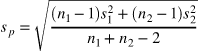

$H_0$: There is no difference in regard to the average time for selling homes for its two offices

$H_a$: There is a difference in regard to the average time for selling homes for its two offices

In [2]:
n1 = 40
s1 = 15
x̄1 = 90
n2 = 50
s2 = 20
x̄2 = 100
degf = (n1 + n2) - 2

In [3]:
Sp = sqrt(((n1-1)*s1**2 +(n2-1)*s2**2)/(n1+n2-2))
Sp

17.956702977389302

In [4]:
t = (x̄1 - x̄2) / (Sp * sqrt(1 / n1 + 1 / n2))
t

-2.6252287036468456

In [5]:
p = stats.t(degf).sf(t) * 2
p

1.9897901475507607

because p 1.99 > 0.05, we failed to reject H0, which indicates that there is a difference in regard to the average time for selling homes for its two offices

In [26]:
mpg = data('mpg')
mpg = mpg.rename(columns = {'class':'class_type'})
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

# 1
$H_0$: There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: There is a difference in fuel-efficiency in cars from 2008 vs 1999

confidence level: 0.05

In [27]:
x1 = mpg[mpg.year == 1999].hwy
x2 = mpg[mpg.year == 2008].hwy

In [28]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
# Since p value 0.97 is much higher than a value 0.05, failed reject the H0,
# which means there is no difference between them.

(-0.03286431672888292, 0.9738110448529322)

# 2

$H_0$: There is no difference in fuel-efficiency between compact cars and the average car

$H_a$: Compact cars are morefuel-efficient than the average car

confidence level: 0.05


In [52]:
x = mpg[mpg.class_type == 'compact'].hwy
mu = mpg.hwy.mean()
p = stats.ttest_1samp(x, mu)
p[1] < 0.05

# Since p value is less than a value, reject the null hypothesis, which means there is a statistically significant
# diffrence between compact cars and the average cars in regard to fuel-efficient

True

# 3

- $H_0$: Manual cars are same as automatic cars in regard to gas mileage 
- $H_a$: manual cars get better gas mileage than automatic cars
- confidence level: 0.05


In [75]:
auto = mpg.trans.str.contains('auto')
manual = mpg.trans.str.contains('manual')
x1=mpg[auto].hwy
x2=mpg[manual].hwy

In [76]:
tstat, p = stats.ttest_ind(x1, x2)
tstat, p 
# Since p value is greater than a value, failed to reject the null hypothesis, that there is no 
# statistically significant difference between manual cars and automatic cars in regard to gas mileage

(-4.368349972819688, 1.888044765552951e-05)